In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("global-data-on-sustainable-energy.csv")
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [3]:
data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [4]:
a = np.zeros(21, dtype="int") 
y = np.zeros(21, dtype="int")


for i in range(21):
    a[i] = len(data[data["Year"] == 2000+i])
    y[i] = 2000+i

Country_Amount = pd.DataFrame({"Year":y, "Amount":a})

Country_Amount

,Year,Amount
0,2000,173
1,2001,172
2,2002,172
3,2003,172
4,2004,172
5,2005,172
6,2006,172
7,2007,174
8,2008,174
9,2009,174


In [5]:
data["Entity"].value_counts()

Entity
Afghanistan      21
Oman             21
Netherlands      21
New Caledonia    21
New Zealand      21
                 ..
Zimbabwe         21
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: count, Length: 176, dtype: int64

In [6]:
entity_counts = data["Entity"].value_counts()

eligible_entities = entity_counts[entity_counts == 21].index
Eligible = data[data["Entity"].isin(eligible_entities)]

ineligible_entities = entity_counts[entity_counts != 21].index
Ineligible = data[data["Entity"].isin(ineligible_entities)]

In [7]:
Ineligible["Entity"].value_counts()

Entity
Montenegro       14
Serbia           14
South Sudan       8
French Guiana     1
Name: count, dtype: int64

In [8]:
Eligible["Entity"].value_counts().sort_index()

Entity
Afghanistan            21
Albania                21
Algeria                21
Angola                 21
Antigua and Barbuda    21
                       ..
Uzbekistan             21
Vanuatu                21
Yemen                  21
Zambia                 21
Zimbabwe               21
Name: count, Length: 172, dtype: int64

In [9]:
Eligible.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                                9
Access to clean fuels for cooking                                    168
Renewable-electricity-generating-capacity-per-capita                 903
Financial flows to developing countries (US $)                      2058
Renewable energy share in the total final energy consumption (%)     191
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          199
Value_co2_emissions_kt_by_country                  

In [10]:
Eligible.drop(["Financial flows to developing countries (US $)",
               "Renewables (% equivalent primary energy)"], axis = 1, inplace = True) # Too many missing values
Eligible.drop(["Latitude", "Longitude", "Land Area(Km2)", "Density\\n(P/Km2)"], axis = 1, inplace=True) # Irrelevant
Eligible.drop(['gdp_growth'], axis=1, inplace=True)

C:\Users\Nico\AppData\Local\Temp\ipykernel_15656\1985937368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible.drop(["Financial flows to developing countries (US $)",
C:\Users\Nico\AppData\Local\Temp\ipykernel_15656\1985937368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible.drop(["Latitude", "Longitude", "Land Area(Km2)", "Density\\n(P/Km2)"], axis = 1, inplace=True) # Irrelevant
C:\Users\Nico\AppData\Local\Temp\ipykernel_15656\1985937368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [11]:
Eligible.isnull().sum()

Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                               9
Access to clean fuels for cooking                                   168
Renewable-electricity-generating-capacity-per-capita                903
Renewable energy share in the total final energy consumption (%)    191
Electricity from fossil fuels (TWh)                                  21
Electricity from nuclear (TWh)                                      126
Electricity from renewables (TWh)                                    21
Low-carbon electricity (% electricity)                               42
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         199
Value_co2_emissions_kt_by_country                                   424
gdp_per_capita                                                  

In [12]:
def fillBlankByEntityyMean(colName):
    meanByEntity = Eligible.groupby('Entity')[colName].transform('mean')
    Eligible[colName].fillna(meanByEntity, inplace = True)

In [13]:
fillBlankByEntityyMean('Electricity from fossil fuels (TWh)')
fillBlankByEntityyMean('Electricity from nuclear (TWh)')
fillBlankByEntityyMean('Electricity from renewables (TWh)')
fillBlankByEntityyMean('Low-carbon electricity (% electricity)')
fillBlankByEntityyMean('Value_co2_emissions_kt_by_country')
fillBlankByEntityyMean('Access to clean fuels for cooking')
fillBlankByEntityyMean('Renewable energy share in the total final energy consumption (%)')
fillBlankByEntityyMean('Energy intensity level of primary energy (MJ/$2017 PPP GDP)')

Eligible['Access to electricity (% of population)'].fillna(0, inplace = True)
Eligible['Renewable-electricity-generating-capacity-per-capita'].fillna(0, inplace = True)

C:\Users\Nico\AppData\Local\Temp\ipykernel_15656\2856198078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible[colName].fillna(meanByEntity, inplace = True)
C:\Users\Nico\AppData\Local\Temp\ipykernel_15656\2856198078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eligible[colName].fillna(meanByEntity, inplace = True)
C:\Users\Nico\AppData\Local\Temp\ipykernel_15656\2856198078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [14]:
Eligible.isnull().sum()

Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking                                   168
Renewable-electricity-generating-capacity-per-capita                  0
Renewable energy share in the total final energy consumption (%)     21
Electricity from fossil fuels (TWh)                                  21
Electricity from nuclear (TWh)                                      126
Electricity from renewables (TWh)                                    21
Low-carbon electricity (% electricity)                               42
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          21
Value_co2_emissions_kt_by_country                                   252
gdp_per_capita                                                  

All of those are multiply of 21 which means for that entity, every single values for that column doesn't exists. Because there is no better way to fill, dropping the rows is a valid option because of a wide variance.<br><br>

gdp per capita is the one this model wants to predict. So, any missing values will results with the entire row being dropped

In [15]:
print(Eligible.shape)
Eligible = Eligible.dropna()
print(Eligible.shape)
Eligible.isnull().sum()

(3612, 14)
(3009, 14)


Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_per_capita                                                      0
dtype: int64

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
from sklearn.preprocessing import FunctionTransformer

scaler = FunctionTransformer(np.log1p)

colName = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)', 
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country']

for i in colName:
    Eligible[i] = scaler.fit_transform(Eligible[i].values.reshape(-1, 1))

In [18]:
category_amt = 10
limiters = np.arange(1/category_amt,1,1/category_amt)
limiters
dataset = Eligible

In [19]:
dataset['gdp_per_capita_category'] = np.nan
percentiles = dataset.groupby('Year')['gdp_per_capita'].quantile(limiters).unstack()
percentiles

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Year,,,,,,,,,
2000,270.542236,443.314194,658.348608,1080.510472,1861.898065,3293.229979,4787.801441,12042.953710,24285.466820
2001,293.167634,456.640648,697.201572,1080.084930,1824.101683,3014.242654,5026.081872,12375.465396,24465.968846
2002,299.255775,436.242884,761.493123,1104.902546,1845.669127,2871.441553,4945.379705,12980.074154,26136.942184
2003,327.777267,503.738001,845.627585,1133.955482,2209.497245,3375.046295,5572.739545,15397.400370,31895.851474
2004,387.631201,570.369613,1030.155364,1411.675746,2610.185422,3747.491569,6499.754501,17711.855676,36139.424930
2005,350.185736,707.589077,1087.716726,1825.590852,3002.138604,4206.467113,7921.461465,18503.438632,37609.511392
2006,410.077937,818.796179,1244.845512,2240.072626,3362.968419,5203.691516,9133.259723,19762.893842,40609.037602
2007,441.813333,901.358709,1390.927748,2727.097026,3851.437869,5762.355192,11614.642410,23385.425784,44580.495312
2008,544.106359,1032.027815,1568.141237,3330.184420,4307.580023,6395.684739,12272.127302,26429.020358,47995.384062


In [20]:
def categorize(row):
    year = row['Year']
    val = row['gdp_per_capita']
    
    q = np.zeros(len(limiters))
    
    for i in range(len(limiters)):
        q[i] = percentiles.loc[year, limiters[i]]
    
    pos = 0
    
    for i in q:
        if val <= i:
            break
        else:
            pos+=1
    return pos            

dataset['gdp_per_capita_category'] = dataset.apply(categorize, axis=1)

In [21]:
dataset.drop(['gdp_per_capita'], axis=1, inplace=True) # Unused
dataset.drop(['Entity', 'Year'], axis = 1, inplace=True) # Irrelevant

dataset.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_per_capita_category
2,2.342686,2.219203,2.248129,3.659193,0.122218,0.0,0.444686,4.408662,5.355936,0.875469,6.938284,0
3,2.756110,2.351375,2.207175,3.628599,0.270027,0.0,0.488580,4.219821,5.442280,0.875469,7.107425,0
4,3.047611,2.476538,2.169054,3.811982,0.285179,0.0,0.444686,4.157653,5.324137,0.788457,6.938284,0
5,3.273019,2.580217,2.141242,3.551914,0.292670,0.0,0.463734,4.165748,5.533663,0.879627,7.346655,0
6,3.456906,2.698000,2.128232,3.493169,0.182322,0.0,0.494696,4.346276,5.721691,0.916291,7.473637,0


In [28]:
col = dataset.columns
col

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_per_capita_category'],
      dtype='object')

<Axes: >

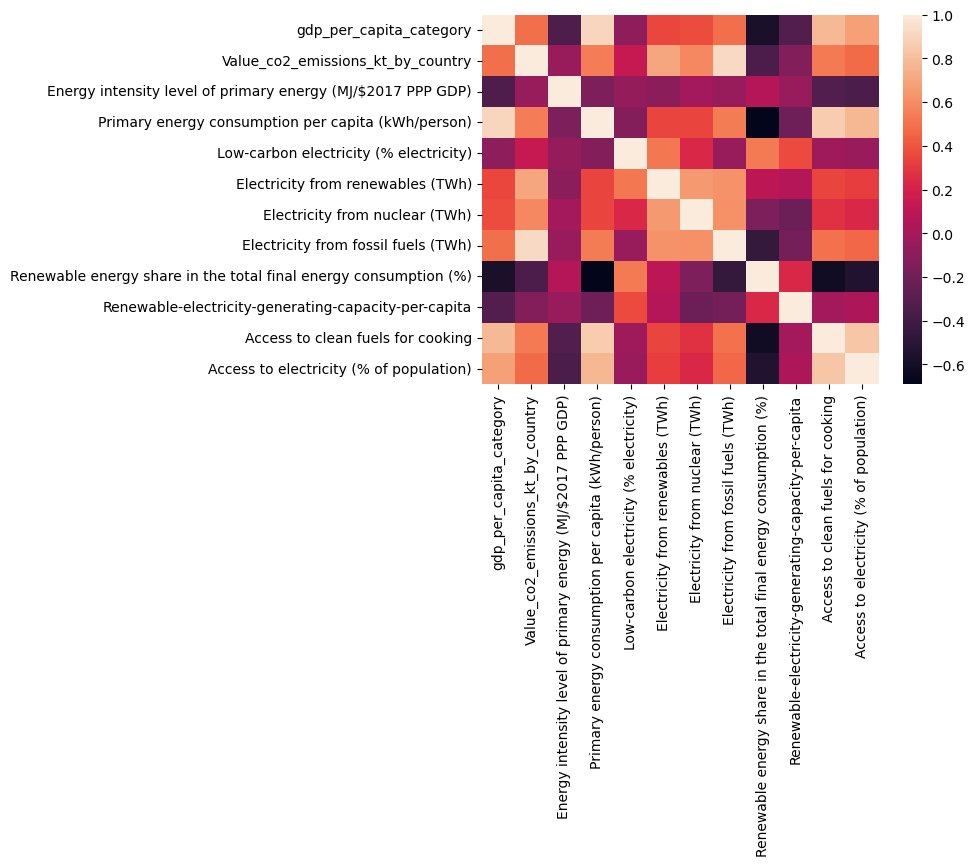

In [26]:
sns.heatmap(dataset[col[::-1]].corr())

In [40]:
temp = dataset.copy()
temp['gdp_per_capita_category'].replace([0,1,2,3,4,5,6,7,8,9], 
                                        ['0 - 1', '0 - 1', '2 - 3', '2 - 3', '4 - 5', '4 - 5', '6 - 7', '6 - 7', '8 - 9', '8 - 9'],
                                        inplace=True)

<Axes: xlabel='Primary energy consumption per capita (kWh/person)', ylabel='Access to clean fuels for cooking'>

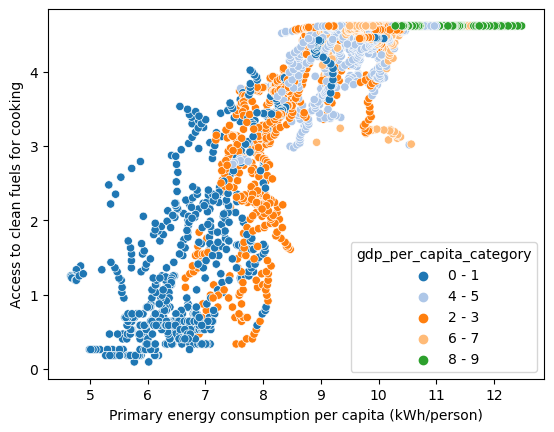

In [44]:
sns.scatterplot(temp, x="Primary energy consumption per capita (kWh/person)", y="Access to clean fuels for cooking", hue="gdp_per_capita_category", palette="tab20")

<Axes: xlabel='Renewable-electricity-generating-capacity-per-capita', ylabel='Renewable energy share in the total final energy consumption (%)'>

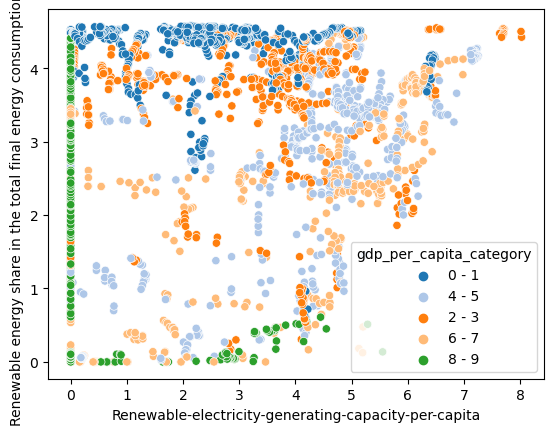

In [43]:
sns.scatterplot(temp, x="Renewable-electricity-generating-capacity-per-capita", y="Renewable energy share in the total final energy consumption (%)", hue="gdp_per_capita_category", palette="tab20")